In [24]:
import sqlite3
conn = sqlite3.connect('Data/im.db')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [25]:
#Data cleaning
budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
budgets['release_date'] = pd.to_datetime(budgets['release_date'], format='%b %d, %Y')
budgets['production_budget'] = budgets['production_budget'].replace('\$', '', regex=True)
budgets['production_budget'] = budgets['production_budget'].replace(',', '', regex=True)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('\$', '', regex=True)
budgets['domestic_gross'] = budgets['domestic_gross'].replace(',', '', regex=True)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('\$', '', regex=True)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace(',', '', regex=True)
budgets['production_budget'] = budgets['production_budget'].astype('int64')
budgets['domestic_gross'] = budgets['domestic_gross'].astype('int64')
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype('int64')
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [26]:
#Create revenues and ROI column
budgets['revenues'] = budgets['worldwide_gross']-budgets['production_budget']
budgets['ROI'] = budgets['revenues']/budgets['production_budget']
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


In [27]:
#Confirming there is a correlation between budget and revenues
corr = budgets['production_budget'].corr(budgets['worldwide_gross'])
print ("Correlation between Budget and WWGross is: ", round(corr, 2))

Correlation between Budget and WWGross is:  0.75


In [28]:
#but a very little negative correlation between budget and roi
corr = budgets['production_budget'].corr(budgets['ROI'])
print ("Correlation between Budget and ROI is: ", round(corr, 2))

Correlation between Budget and ROI is:  -0.05


In [29]:
#for this analysis we will focus on the 25% of the movies that generated more profits
mayor_profits = budgets.loc[budgets['ROI'] > (budgets['ROI'].quantile(.75))]
mayor_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
...,...,...,...,...,...,...,...,...
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,2034928,290.704000
5774,75,2004-10-08,Primer,7000,424760,841926,834926,119.275143
5775,76,2006-05-26,Cavite,7000,70071,71644,64644,9.234857
5778,79,1999-04-02,Following,6000,48482,240495,234495,39.082500


<ipython-input-708-a79b5b9ebd8e>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


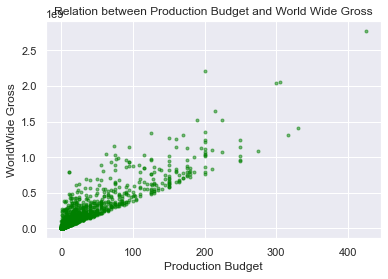

In [708]:
#relation between Budget and WWGross
x= mayor_profits['production_budget']/1000000 
y = mayor_profits['worldwide_gross']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = '.', color = 'green', alpha=0.5)
ax.set_title('Relation between Production Budget and World Wide Gross')
ax.set_ylabel('WorldWide Gross')
ax.set_xlabel('Production Budget')
fig.show();

<ipython-input-707-bddb85dca677>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


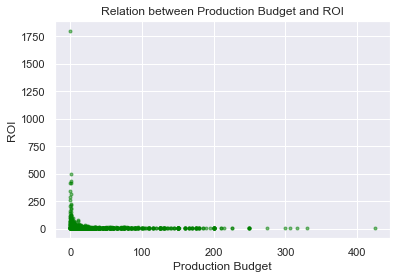

In [707]:
#Relation between budget and ROI
x= mayor_profits['production_budget']/1000000 
y = mayor_profits['ROI']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = '.', color = 'green', alpha=0.5)
ax.set_title('Relation between Production Budget and ROI')
ax.set_ylabel('ROI')
ax.set_xlabel('Production Budget')
fig.show();

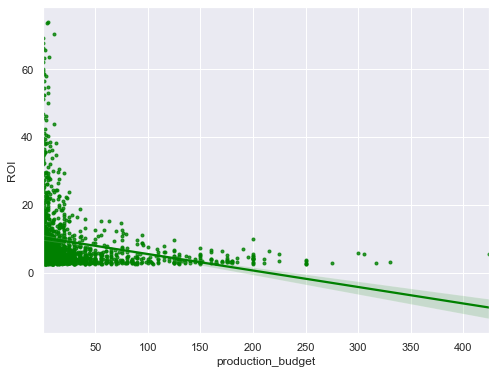

In [706]:
#Without the last 2.5%
clean_mayor_profits = mayor_profits.drop(mayor_profits[mayor_profits['ROI'] > mayor_profits['ROI'].quantile(.975)].index)
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=clean_mayor_profits['production_budget']/1000000, y=clean_mayor_profits['ROI'], color = 'green', marker = '.');

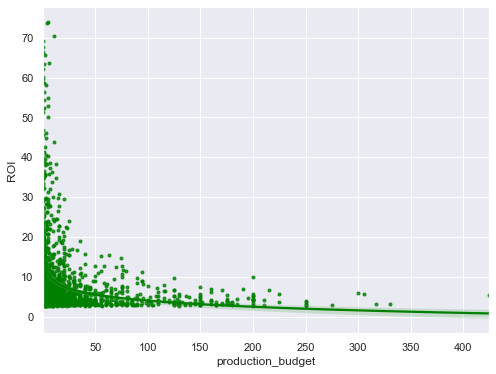

In [705]:
clean_mayor_profits = mayor_profits.drop(mayor_profits[mayor_profits['ROI'] > mayor_profits['ROI'].quantile(.975)].index)
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=clean_mayor_profits['production_budget']/1000000, y=clean_mayor_profits['ROI'], color = 'green', marker = '.', logx = True);

In [33]:
clean_mayor_profits['production_budget'].describe()

count    1.409000e+03
mean     3.274963e+07
std      4.879021e+07
min      6.000000e+03
25%      4.300000e+06
50%      1.400000e+07
75%      3.800000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

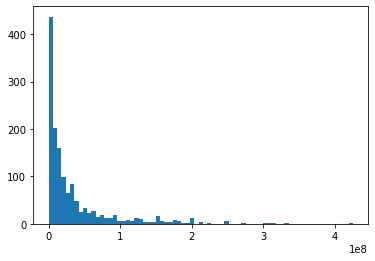

In [34]:
plt.hist(clean_mayor_profits['production_budget'], bins='auto');

In [35]:
clean_mayor_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
...,...,...,...,...,...,...,...,...
5765,66,2001-03-09,Dayereh,10000,673780,673780,663780,66.378000
5766,67,2006-04-28,Clean,10000,138711,138711,128711,12.871100
5767,68,2001-07-06,Cure,10000,94596,94596,84596,8.459600
5775,76,2006-05-26,Cavite,7000,70071,71644,64644,9.234857


In [36]:
most_voted_movies = pd.read_sql("""
WITH popular_movies 
AS
(
SELECT 
       p.primary_name, b.primary_title, r.numvotes, 
       r.averagerating, b.genres
FROM 
       movie_basics as b
INNER JOIN 
       movie_ratings as r
ON 
       b.movie_id = r.movie_id
INNER JOIN 
       directors as d
ON
       r.movie_id = d.movie_id
INNER JOIN 
       persons as p
ON
       d.person_id = p.person_id

GROUP BY primary_title

ORDER BY r.numvotes DESC


)

SELECT 
         primary_title as 'Title',primary_name as 'Director', averagerating as 'Average Rating', 
         numvotes as 'Num. of Votes', genres as 'Genres'
FROM
    popular_movies

ORDER BY 
    numvotes DESC;


""", conn)

In [37]:
most_voted_movies

,Title,Director,Average Rating,Num. of Votes,Genres
0,Inception,Christopher Nolan,8.8,1841066,"Action,Adventure,Sci-Fi"
1,The Dark Knight Rises,Christopher Nolan,8.4,1387769,"Action,Thriller"
2,Interstellar,Christopher Nolan,8.6,1299334,"Adventure,Drama,Sci-Fi"
3,Django Unchained,Quentin Tarantino,8.4,1211405,"Drama,Western"
4,The Avengers,Joss Whedon,8.1,1183655,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
69280,...dann bin ich ja ein Mörder!,Walter Manoschek,8.6,5,Documentary
69281,-1287,Ian Thomas Ash,8.2,5,"Biography,Documentary"
69282,(313) Choices,Tyler Clifton,5.6,5,Drama
69283,#Single,Andrea Eder,6.6,5,Documentary


In [38]:
most_voted_movies['Title'] = most_voted_movies['Title'].str.lower()

In [39]:
clean_mayor_profits['movie'] = clean_mayor_profits['movie'].str.lower()
clean_mayor_profits.rename(columns = {'movie':'Title', 'id': 'ID', 'production_budget': 'Budget', 'revenues':'Revenues'}, inplace = True)

In [40]:
merged_profits_votes = clean_mayor_profits.merge(most_voted_movies, on = 'Title', how = 'left')

In [41]:
merged_profits_votes.head()

,ID,release_date,Title,Budget,domestic_gross,worldwide_gross,Revenues,ROI,Director,Average Rating,Num. of Votes,Genres
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2351345279,5.532577,Atsushi Wada,6.1,43.0,Horror
1,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,3.243841,Joss Whedon,7.3,665594.0,"Action,Adventure,Sci-Fi"
2,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747,999721747,3.153696,NaN,NaN,NaN,NaN
3,6,2015-12-18,star wars ep. vii: the force awakens,306000000,936662225,2053311220,1747311220,5.710167,NaN,NaN,NaN,NaN
4,7,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,1748134200,5.827114,Anthony Russo,8.5,670926.0,"Action,Adventure,Sci-Fi"


In [42]:
merged_profits_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1409
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               1410 non-null   int64         
 1   release_date     1410 non-null   datetime64[ns]
 2   Title            1410 non-null   object        
 3   Budget           1410 non-null   int64         
 4   domestic_gross   1410 non-null   int64         
 5   worldwide_gross  1410 non-null   int64         
 6   Revenues         1410 non-null   int64         
 7   ROI              1410 non-null   float64       
 8   Director         546 non-null    object        
 9   Average Rating   546 non-null    float64       
 10  Num. of Votes    546 non-null    float64       
 11  Genres           544 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 143.2+ KB


In [436]:
#Slicing by budget
low_budget = budgets.loc[budgets['production_budget'] <= (budgets['production_budget'].quantile(.33))]
low_budget['ROI'].mean()

7.691143265954438

In [437]:
low_budget['ROI'].describe()

count    1921.000000
mean        7.691143
std        50.724167
min        -1.000000
25%        -0.964953
50%         0.083970
75%         3.906910
max      1799.000000
Name: ROI, dtype: float64

In [438]:
clean_low_budget = low_budget.drop(low_budget[low_budget['ROI'] > 1750].index)
clean_low_budget['ROI'].mean()

6.758169903072123

In [439]:
clean_low_budget['ROI'].describe()

count    1920.000000
mean        6.758170
std        30.021603
min        -1.000000
25%        -0.964977
50%         0.081852
75%         3.893394
max       497.750000
Name: ROI, dtype: float64

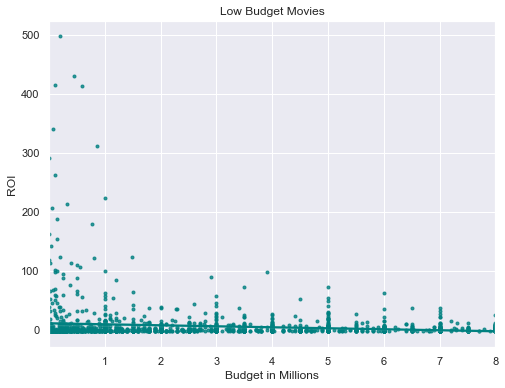

In [574]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=(clean_low_budget['production_budget']/1000000), y=clean_low_budget['ROI'], color = 'teal', marker = '.')
ax.set_xlabel('Budget in Millions')
ax.set_title('Low Budget Movies');

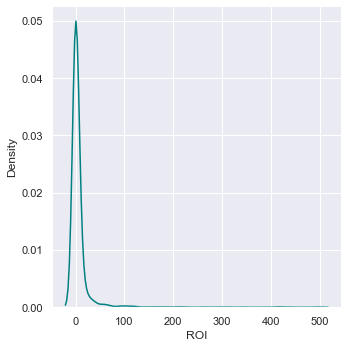

In [573]:
sns.displot(data = clean_low_budget, x = clean_low_budget['ROI'], color = 'teal', kind = 'kde');

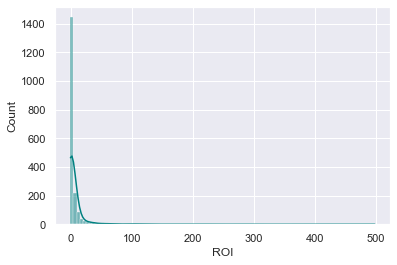

In [572]:
sns.set(color_codes=True)
sns.histplot(clean_low_budget['ROI'], kde=True, bins=100, color = 'teal');

In [445]:
high_budget = budgets.loc[budgets['production_budget'] >= (budgets['production_budget'].quantile(.66))]
high_budget['ROI'].mean()

1.6267710020424566

In [446]:
high_budget['ROI'].describe()

count    2012.000000
mean        1.626771
std         2.330091
min        -1.000000
25%         0.000884
50%         1.068202
75%         2.471338
max        18.927371
Name: ROI, dtype: float64

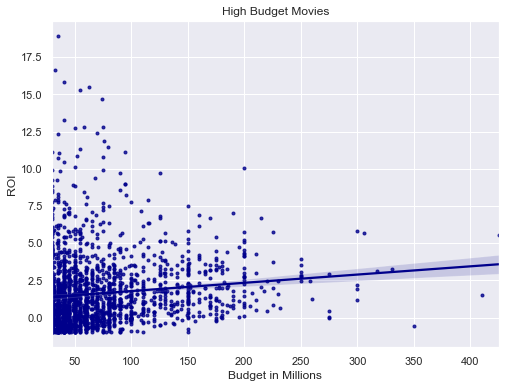

In [571]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=(high_budget['production_budget']/1000000), y=high_budget['ROI'], color = 'darkblue', marker = '.')
ax.set_xlabel('Budget in Millions')
ax.set_title('High Budget Movies');

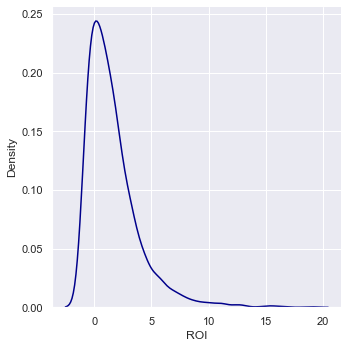

In [570]:
sns.displot(data = high_budget, x = high_budget['ROI'], color = 'darkblue', kind = 'kde');

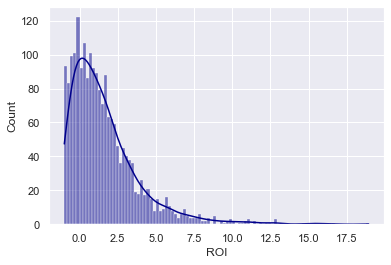

In [569]:
sns.set(color_codes=True)
sns.histplot(high_budget['ROI'], kde=True, bins=100, color = 'darkblue');

In [450]:
medium_budget = budgets.loc[(budgets['production_budget'] >= budgets['production_budget'].quantile(.34)) & (budgets['production_budget'] <= budgets['production_budget'].quantile(.65))]
medium_budget['ROI'].mean()

2.0846559024174764

In [451]:
medium_budget['ROI'].describe()

count    1810.000000
mean        2.084656
std         4.928638
min        -1.000000
25%        -0.453097
50%         0.585754
75%         2.597222
max        74.520507
Name: ROI, dtype: float64

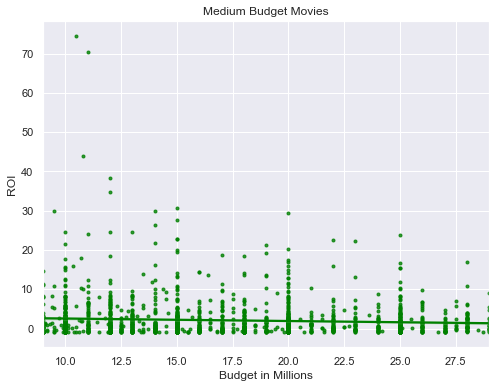

In [568]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=(medium_budget['production_budget']/1000000), y=medium_budget['ROI'], color = 'green', marker = '.')
ax.set_xlabel('Budget in Millions')
ax.set_title('Medium Budget Movies');

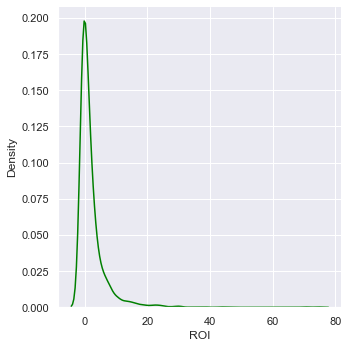

In [567]:
sns.displot(data = medium_budget, x = medium_budget['ROI'], color = 'green', kind = 'kde');

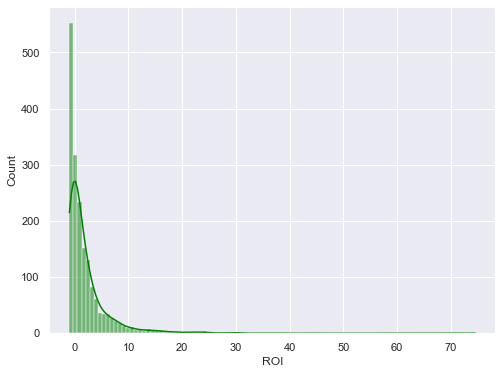

In [566]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set(color_codes=True)
sns.histplot(medium_budget['ROI'], kde=True, bins=100, color = 'green');

In [455]:
budgets['ROI'].describe()

count    5782.000000
mean        3.800161
std        29.530282
min        -1.000000
25%        -0.507704
50%         0.708310
75%         2.758346
max      1799.000000
Name: ROI, dtype: float64

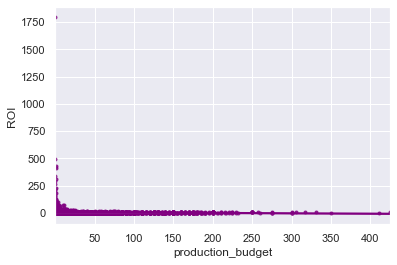

In [456]:
sns.regplot(x=(budgets['production_budget']/1000000), y=budgets['ROI'], color = 'purple', marker = '.');

In [457]:
clean_budget = budgets.drop(budgets[budgets['ROI'] > 1750].index)
clean_budget['ROI'].describe()

count    5781.000000
mean        3.489627
std        17.734827
min        -1.000000
25%        -0.507912
50%         0.707632
75%         2.755682
max       497.750000
Name: ROI, dtype: float64

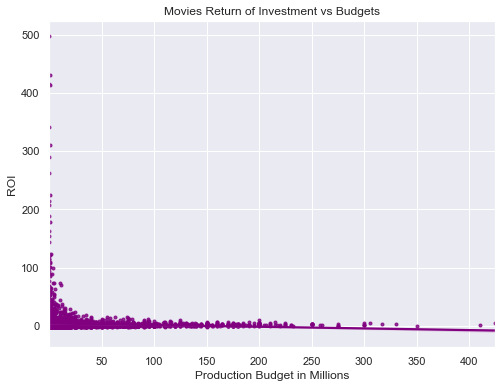

In [458]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set(color_codes=True)
sns.regplot(x=(clean_budget['production_budget']/1000000), y=clean_budget['ROI'], color = 'purple', marker = '.')
ax.set_title('Movies Return of Investment vs Budgets')
ax.set_xlabel('Production Budget in Millions')
ax.set_ylabel('ROI');


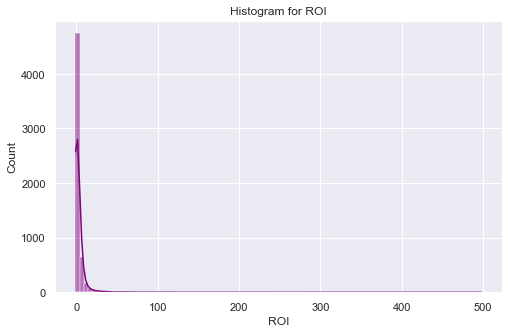

In [459]:
fig, ax = plt.subplots(figsize=(8,5))
sns.set(color_codes=True)
sns.histplot(clean_budget['ROI'], kde=True, bins=100, color = 'purple')
ax.set_title('Histogram for ROI');

In [692]:
print('Low Budget is between $', low_budget['production_budget'].min(), 'and $', low_budget['production_budget'].max())
print('Medium Budget is between $', medium_budget['production_budget'].min(), 'and $', medium_budget['production_budget'].max())
print('High Budget is between $', high_budget['production_budget'].min(), 'and $', high_budget['production_budget'].max())

Low Budget is between $ 1100 and $ 8000000
Medium Budget is between $ 9000000 and $ 29000000
High Budget is between $ 30000000 and $ 425000000


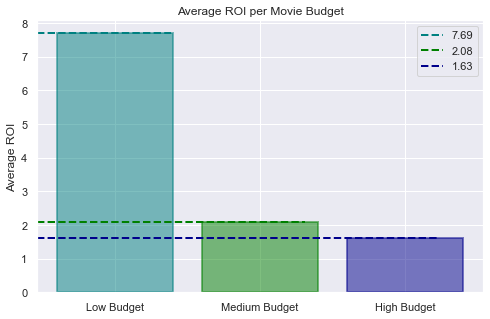

In [693]:
x = ('Low Budget', 'Medium Budget', 'High Budget')
y = (low_budget['ROI'].mean(), medium_budget['ROI'].mean(), high_budget['ROI'].mean())
my_colors = ['teal','green','darkblue']
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x, y, color= my_colors, alpha = .5, edgecolor= my_colors,linewidth = 2)

ax.set_ylabel('Average ROI')
ax.axhline(low_budget['ROI'].mean(),xmin= 0,xmax= .3, color='teal',linestyle='--',lw=2,label=round(low_budget['ROI'].mean(),2))
ax.axhline(medium_budget['ROI'].mean(),xmin= 0,xmax= .6, color='green',linestyle='--',lw=2,label=round(medium_budget['ROI'].mean(),2))
ax.axhline(high_budget['ROI'].mean(),xmin= 0,xmax= .9, color='darkblue',linestyle='--',lw=2,label=round(high_budget['ROI'].mean(),2))
ax.legend(loc= 'best')  
ax.set_title('Average ROI per Movie Budget')
  
plt.show()

In [460]:
#Hypothesis Testing
#H1 = The ROI of low budget movies is higher than the rest of movies.
#NullH = The ROI of low budget movies is not different from the rest of the movies
#Pop. mean = 3.489627
#sample mean = 8.969387
#sample std =  56.585026
#num of observations = 1535
#degrees of freedom = 1534
import numpy as np
from scipy import stats 
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [461]:
mu = budgets['ROI'].mean()
x_bar = low_budget['ROI'].mean()
sigma = low_budget['ROI'].std()
n = len(low_budget['ROI'])
df = n-1
diff = x_bar - mu

In [463]:
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t

3.362079435878072

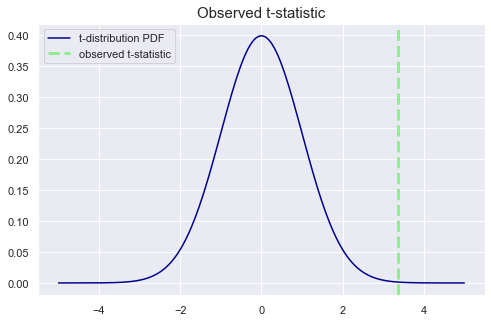

In [464]:

fig, ax = plt.subplots(figsize=(8,5))
x = np.linspace(-5, 5, 200)
# (2) use stats.t.pdf to get values on the probability density
# function for the t-distribution
y = stats.t.pdf(x, df, 0, 1)

# Plot the PDF as a line graph
ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t, color='lightgreen', linestyle='--', lw=3,label='observed t-statistic')
ax.set_title('Observed t-statistic', fontsize = 15)
ax.legend();

In [465]:
# alpha level : 5%
stats.t.cdf(1.645, df=1534)

0.9499126551928386

In [466]:
t_crit = stats.t.ppf(1 - 0.05, df=1534)
t_crit

1.6458475613597114

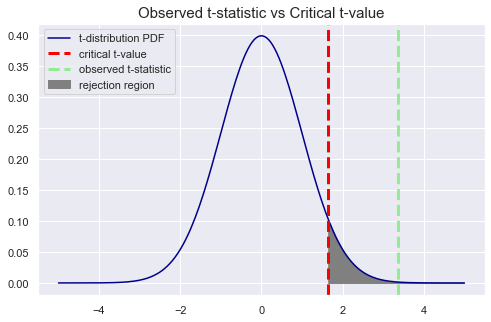

In [564]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Plot the PDF as a line graph
# (x and y were created in previous plotting code)
ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our critical t-value
ax.axvline(t_crit,color='red',linestyle='--',lw=3,label='critical t-value')

# Fill area under line graph where x value is creater than critical t
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t, color='lightgreen', linestyle='--', lw=3,label='observed t-statistic')
ax.set_title('Observed t-statistic vs Critical t-value', fontsize = 15)
ax.legend();

In [468]:
# There is statistically significance increase in ROI for low budget movies.
p_value = stats.t.sf(t, df=1534)
alpha = .05
p_value


0.0003963031498936095

In [469]:
p_value < alpha

True

In [470]:
results = stats.ttest_1samp(
    a=low_budget['ROI'],   # the entire array-like sample
    popmean=budgets['ROI'].mean() # the mean you are testing the sample against
)

results

Ttest_1sampResult(statistic=3.362079435878072, pvalue=0.0007887582721485481)

In [471]:
alpha = 0.05

t_crit = stats.t.ppf(1 - alpha, df=len(low_budget['ROI'])-1)

if results.statistic > t_crit:
    print("Null hypothesis rejected.")
    print("The increase in ROI is statistically significant at the", alpha, "level.")
else:
    print("Failed to reject the null hypothesis.")
    print("The increase in ROI is not statistically significant at the", alpha, "level.")

Null hypothesis rejected.
The increase in ROI is statistically significant at the 0.05 level.


In [694]:
lowbudget_wroi = len(low_budget[low_budget['ROI']> 0])
print ('The percentage of low budget movies with ROI is', round(lowbudget_wroi/len(low_budget['ROI']),3))

The percentage of low budget movies with ROI is 0.515


In [695]:
highbudget_wroi = len(high_budget[high_budget['ROI']> 0])
print ('The percentage of high budget movies with ROI is', round(highbudget_wroi/len(high_budget['ROI']),3))

The percentage of high budget movies with ROI is 0.75


In [696]:
mediumbudget_wroi = len(medium_budget[medium_budget['ROI']> 0])
print ('The percentage of medium budget movies with ROI is', round(mediumbudget_wroi/len(medium_budget['ROI']),3))

The percentage of medium budget movies with ROI is 0.624


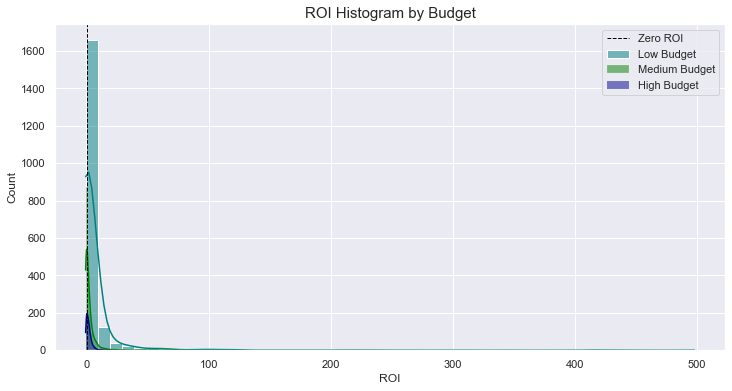

In [697]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set(color_codes=True)
sns.histplot(clean_low_budget['ROI'], kde=True, bins=50, color = 'teal', label = 'Low Budget')
sns.histplot(medium_budget['ROI'], kde=True, bins=50, color = 'green', label = 'Medium Budget')
sns.histplot(high_budget['ROI'], kde=True, bins=50, color = 'darkblue', label = 'High Budget')
ax.axvline(0,color='black',linestyle='--',lw=1,label='Zero ROI')
ax.set_title('ROI Histogram by Budget', fontsize = 15)
ax.legend();

In [698]:
cleanclean_low = low_budget[low_budget['ROI'] < 10]
cleanclean_medium = medium_budget[medium_budget['ROI'] < 10]
cleanclean_high = high_budget[high_budget['ROI'] < 10]

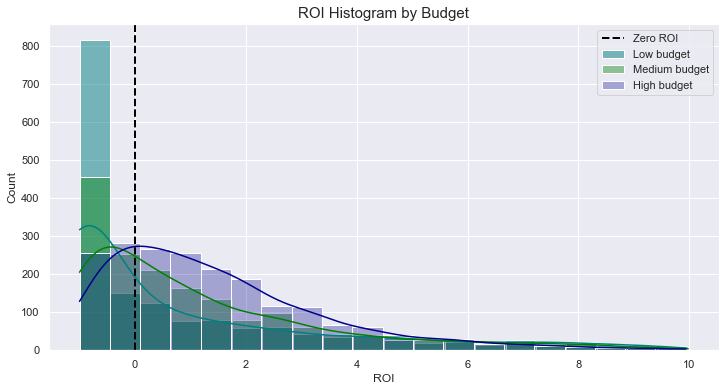

In [699]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set(color_codes=True)
sns.histplot(cleanclean_low['ROI'], kde=True, bins=20, color = 'teal', alpha = .5, label = 'Low budget', legend = True)
sns.histplot(cleanclean_medium['ROI'], kde=True, bins=20, color = 'green', alpha = .4, label = 'Medium budget', legend = True )
sns.histplot(cleanclean_high['ROI'], kde=True, bins=20, color = 'darkblue', alpha = .3, label = 'High budget')
ax.axvline(0,color='black',linestyle='--',lw=2,label='Zero ROI')
ax.set_title('ROI Histogram by Budget', fontsize = 15)
ax.legend();


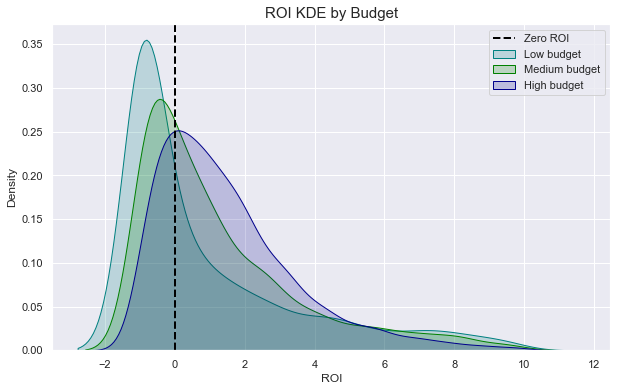

In [700]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set(color_codes=True)
sns.kdeplot(cleanclean_low['ROI'], color = 'teal',  fill = True, label = 'Low budget', legend = True, alpha = .2, linewidth = 1)
sns.kdeplot(cleanclean_medium['ROI'], color = 'green',fill = True, label = 'Medium budget', legend = True, alpha = .2, linewidth = 1 )
sns.kdeplot(cleanclean_high['ROI'], color = 'darkblue',fill = True, label = 'High budget', alpha = .2, linewidth = 1)
ax.axvline(0,color='black',linestyle='--',lw=2,label='Zero ROI')
ax.set_title('ROI KDE by Budget', fontsize = 15)
ax.legend();

In [701]:
data = {'Budget':  ['Low Budget', 'Medium Budget', 'High Budget'],
        'Success': [round(lowbudget_wroi/len(low_budget['ROI']),3),round(mediumbudget_wroi/len(medium_budget['ROI']),3) , round(highbudget_wroi/len(high_budget['ROI']),3)],
        'Failure': [1-(round(lowbudget_wroi/len(low_budget['ROI']),3)),1-(round(mediumbudget_wroi/len(medium_budget['ROI']),3)) , 1 - (round(highbudget_wroi/len(high_budget['ROI']),3))]
        }
budget_percent = pd.DataFrame(data)
print(budget_percent)

          Budget  Success  Failure
0     Low Budget    0.515    0.485
1  Medium Budget    0.624    0.376
2    High Budget    0.750    0.250


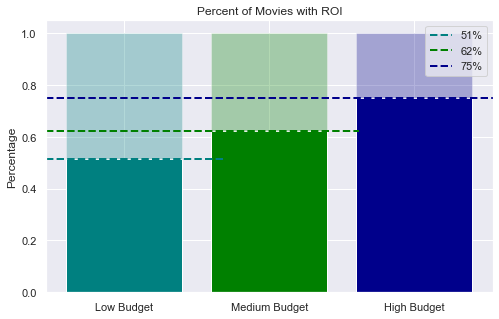

In [702]:
my_colors = ['teal','green','darkblue']
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(budget_percent['Budget'], budget_percent['Success'], color= my_colors)
ax.bar(budget_percent['Budget'] , budget_percent['Failure'], 
       bottom = budget_percent['Success'], color = my_colors, alpha = .3)
ax.set_ylabel('Percentage')
ax.axhline(.515,xmin= 0,xmax= .4, color='teal',linestyle='--',lw=2,label='51%')
ax.axhline(.624,xmin= 0,xmax= .7, color='green',linestyle='--',lw=2,label='62%')
ax.axhline(.75,xmin= 0,xmax= 1, color='darkblue',linestyle='--',lw=2,label='75%')
ax.legend(loc= 'best')  
ax.set_title('Percent of Movies with ROI')
  
plt.show()

In [703]:
cleanhundred_low = low_budget[low_budget['ROI'] < 80]
cleanhundred_medium = medium_budget[medium_budget['ROI'] < 80]
cleanhundred_high = high_budget[high_budget['ROI'] < 80]

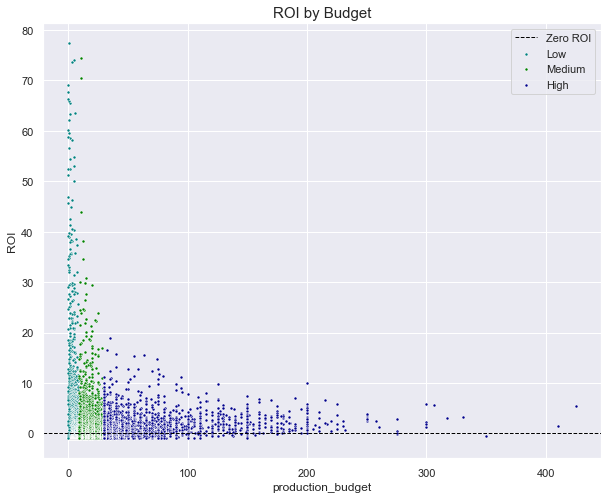

In [704]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(color_codes=True)
sns.scatterplot(x=(cleanhundred_low['production_budget']/1000000), y=cleanhundred_low['ROI'], color = 'teal', marker = '.', label= 'Low')
sns.scatterplot(x=(cleanhundred_medium['production_budget']/1000000), y=cleanhundred_medium['ROI'], color = 'green', marker = '.', label= 'Medium')
sns.scatterplot(x=(cleanhundred_high['production_budget']/1000000), y=cleanhundred_high['ROI'], color = 'darkblue', marker = '.', label = 'High')
ax.axhline(0,color='black',linestyle='--',lw=1,label='Zero ROI')
ax.set_title('ROI by Budget', fontsize = 15)
ax.legend();